[[ 19.  15.  39.]
 [ 21.  15.  81.]
 [ 20.  16.   6.]
 [ 23.  16.  77.]
 [ 31.  17.  40.]
 [ 22.  17.  76.]
 [ 35.  18.   6.]
 [ 23.  18.  94.]
 [ 64.  19.   3.]
 [ 30.  19.  72.]
 [ 67.  19.  14.]
 [ 35.  19.  99.]
 [ 58.  20.  15.]
 [ 24.  20.  77.]
 [ 37.  20.  13.]
 [ 22.  20.  79.]
 [ 35.  21.  35.]
 [ 20.  21.  66.]
 [ 52.  23.  29.]
 [ 35.  23.  98.]
 [ 35.  24.  35.]
 [ 25.  24.  73.]
 [ 46.  25.   5.]
 [ 31.  25.  73.]
 [ 54.  28.  14.]
 [ 29.  28.  82.]
 [ 45.  28.  32.]
 [ 35.  28.  61.]
 [ 40.  29.  31.]
 [ 23.  29.  87.]
 [ 60.  30.   4.]
 [ 21.  30.  73.]
 [ 53.  33.   4.]
 [ 18.  33.  92.]
 [ 49.  33.  14.]
 [ 21.  33.  81.]
 [ 42.  34.  17.]
 [ 30.  34.  73.]
 [ 36.  37.  26.]
 [ 20.  37.  75.]
 [ 65.  38.  35.]
 [ 24.  38.  92.]
 [ 48.  39.  36.]
 [ 31.  39.  61.]
 [ 49.  39.  28.]
 [ 24.  39.  65.]
 [ 50.  40.  55.]
 [ 27.  40.  47.]
 [ 29.  40.  42.]
 [ 31.  40.  42.]
 [ 49.  42.  52.]
 [ 33.  42.  60.]
 [ 31.  43.  54.]
 [ 59.  43.  60.]
 [ 50.  43.  45.]
 [ 47.  43

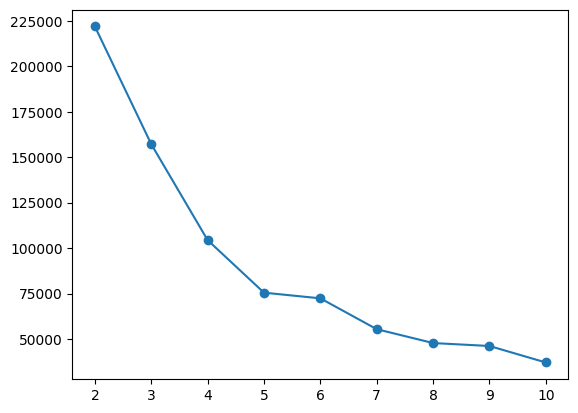

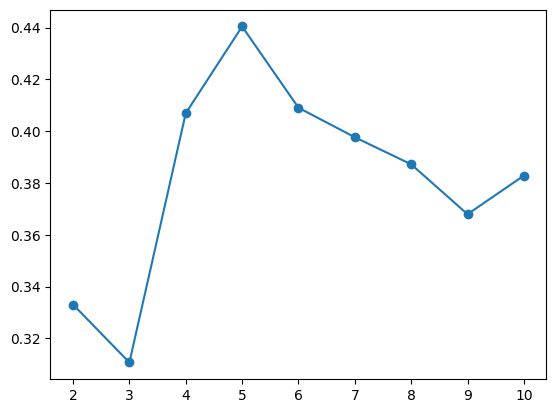

by looking at the plot, the value of k is  6

the randomly selected indices are : 
 [ 28  35  54  87 146 150]

hence, the initial random labels are : 

[[40. 29. 31.]
 [21. 33. 81.]
 [50. 43. 45.]
 [22. 57. 55.]
 [48. 77. 36.]
 [43. 78. 17.]]

after clustering , means = 
 [[ 45.2173913   26.30434783  20.91304348]
 [ 24.96        28.04        77.        ]
 [ 43.72727273  55.48051948  49.32467532]
 [ 32.86206897  78.55172414  82.17241379]
 [ 32.2        109.7         82.        ]
 [ 40.66666667  87.75        17.58333333]]

and the data in these clusters are : 

[19. 15. 39.]
[20. 16.  6.]
[31. 17. 40.]
[35. 18.  6.]
[64. 19.  3.]
[67. 19. 14.]
[58. 20. 15.]
[37. 20. 13.]
[35. 21. 35.]
[52. 23. 29.]
[35. 24. 35.]
[46. 25.  5.]
[54. 28. 14.]
[45. 28. 32.]
[40. 29. 31.]
[60. 30.  4.]
[53. 33.  4.]
[49. 33. 14.]
[42. 34. 17.]
[36. 37. 26.]
[65. 38. 35.]
[48. 39. 36.]
[49. 39. 28.]

[21. 15. 81.]
[23. 16. 77.]
[22. 17. 76.]
[23. 18. 94.]
[30. 19. 72.]
[35. 19. 99.]
[24. 20. 77.]
[22. 20. 79.]

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = np.loadtxt('Mall_Customers.csv',usecols = (2,3,4), skiprows = 1, delimiter=',')
#data = pd.DataFrame(data)
print(x)
inertia = []
k_values = []
silhouette_scores = []
for k in range(2,11):
    k_values.append(k)
    kmeans = KMeans(n_clusters=k).fit(x)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(x,kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values,inertia, marker = 'o')
plt.show()

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.show()

k = 6 

print("by looking at the plot, the value of k is ", k)
print()

index = np.random.randint(0,len(x),(k,))
index.sort()

print("the randomly selected indices are : \n", index)
print()

#initializing k random centres
means = np.empty((k,3))
for i in range(k):
    means[i] = x[index[i]]

print("hence, the initial random labels are : \n")
print(means)
print()

def dist(D,mean):
    return ((np.sum((D-mean)**2))**0.5)

def mean_dist(D,means):
    s = []
    for i in range(len(means)):
        s.append(dist(D,means[i]))
    return s

def mean_by_dist(d,means,D):
    for i in means:
        if(dist(D,i) == d):
            return i
        else:
            continue

def sort(a):
    b = sorted(a)
    return b

def classify(D,means,k):
    classes = [[]]
    for i in range(k-1):
        classes.append([])
    for i in range(len(D)):
        d = mean_dist(D[i],means)
        d.sort()
        m = mean_by_dist(d[0],means,D[i])
        for j in range(k):
            if(m[0] == means[j][0]):
                classes[j].append(D[i])
                break
            else:
                continue
    return classes

def mean(cls):
    sum = 0.0
    N = len(cls)
    for i in range(N):
        sum+=cls[i]
    return sum/N

def mean_update(classes,means,k):
    for i in range(k):
        means[i] = mean(classes[i])        

def cluster(x,means,k,iter):
    for i in range(iter):
        C = classify(x,means,k)
        mean_update(C,means,k)
    print("after clustering , means = \n", means)
    print()
    print("and the data in these clusters are : \n")
    for i in C:
        for j in i:
            print(j)
        print()

cluster(x,means,k,500)